In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [218]:
### Creating the synthesis dataset
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

In [219]:
x

array([[ 0.95597706, -0.91621218],
       [ 0.24839262, -1.17830594],
       [-0.3696455 , -1.64164984],
       ...,
       [ 1.07124352, -1.17045169],
       [ 1.02526491, -0.77863488],
       [ 1.25797903, -0.88589492]], shape=(1000, 2))

In [220]:
y

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

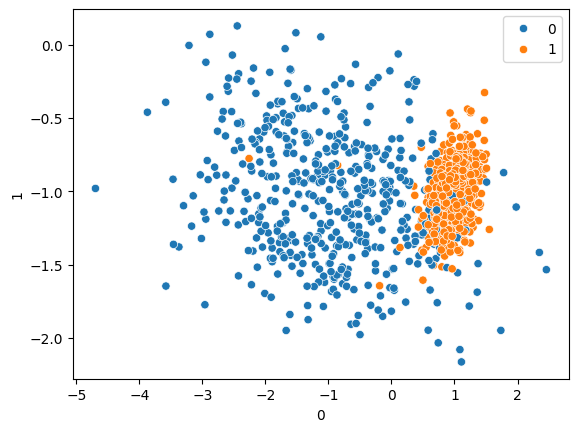

In [221]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [222]:
### Train Test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [223]:
### SVM Classification

from sklearn.svm import SVC

In [224]:
svc = SVC(kernel='linear') # Since, our datapoints are clearly separable therefore, we used here linear kernel

In [225]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [226]:
### Prediction 
y_pred = svc.predict(x_test)

In [227]:
### Performance metrices
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       121
           1       0.89      0.96      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[106  15]
 [  5 124]]


In [228]:
### Play with different kernerls
rbf = SVC(kernel='rbf')
rbf.fit(x_train, y_train)

### Prediction 
y_rbf = rbf.predict(x_test)

print(classification_report(y_test, y_rbf))
print(confusion_matrix(y_test, y_rbf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       121
           1       0.91      0.97      0.94       129

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250

[[109  12]
 [  4 125]]


In [229]:
poly = SVC(kernel='poly')
poly.fit(x_train, y_train)

### Prediction 
y_poly = poly.predict(x_test)

print(classification_report(y_test, y_poly))
print(confusion_matrix(y_test, y_poly))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       121
           1       0.85      0.98      0.91       129

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250

[[ 99  22]
 [  3 126]]
